In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot as jt

jt.style(theme='onedork')

In [315]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,NaN,NaN
1,1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,NaN,NaN
2,2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,NaN,NaN
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,NaN,NaN
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,NaN,NaN
3272,3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,NaN,NaN
3273,3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,NaN,NaN
3274,3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,NaN,NaN


<h1>First Step, Data Insights</h1>

I've attached a photo with the research I've done.
Main ideas:
<ul>
    <li>PH - water with ph between 6.5 and 8.5 is neutral. In our case the mean value is 7.</li>
    <li>Hardness - it does not affect the water Potability, should be correlated with Solids</li>
    <li>Solids - disolved Ca, Cl, NO3 etc. 500ppm is recommended, >1000 is unsafe. In our case mean is 22000 which is unacceptable.</li>
    <li>Chloromines - smaller than 4ppm is safe. Mean is 7</li>
    <li>Sulfate - Not risky. smaller than 500ppm is safe.</li>
    <li>Conductability - Should reflect solids. Might be salt. It presents the salinity. Mean is non-saline</li>
    <li>Organic_carbon - comes from organic compounds. Between 100ppb and 10 pbm is ok. Mean - 14</li>
    <li>Trihalomethanes - very dangerous, cancer. smaller than 80ppm is safe. Mean - 66.</li>
    <li>Turbidity - clarity of water. smaller than 5 NTU is ok. Mean - 4</li>
 </ul>   

In [316]:
df.describe()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
count,3276.000000,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000,0.0,0.0
mean,1637.500000,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110,NaN,NaN
std,945.844067,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849,NaN,NaN
min,0.000000,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000,NaN,NaN
25%,818.750000,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000,NaN,NaN
50%,1637.500000,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000,NaN,NaN
75%,2456.250000,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000,NaN,NaN
max,3275.000000,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000,NaN,NaN


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
 11  Carcinogenics    0 non-null      float64
 12  medical_waste    0 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 332.8 KB


<h3>Drop useless columns</h3>

In [318]:
#these columns are empty or useless
df = df.drop(['Carcinogenics', 'medical_waste'], axis=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<AxesSubplot:xlabel='Potability', ylabel='count'>

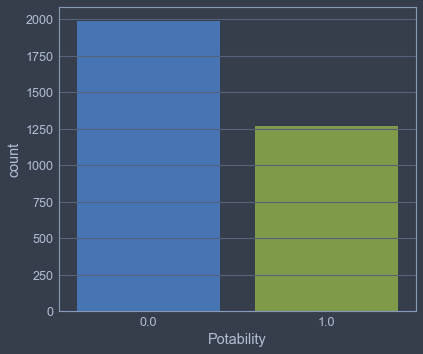

In [320]:
sns.countplot(df_c['Potability'])

<h3>Check correlation between the features and distribution</h3>

<AxesSubplot:>

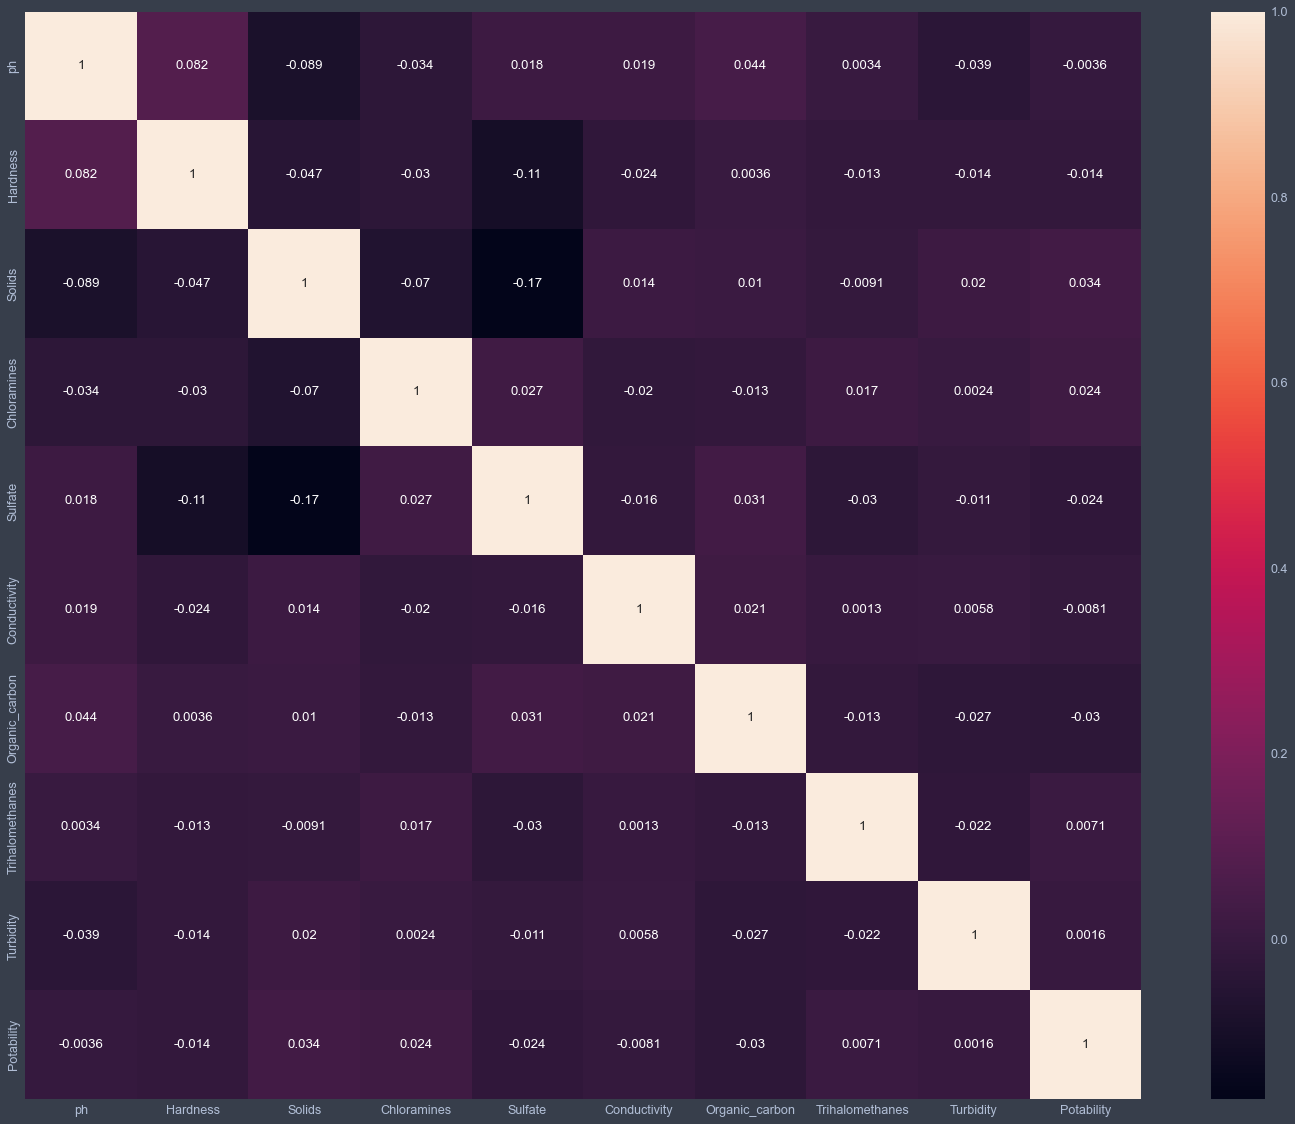

In [417]:
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), annot=True)

<Figure size 1800x1440 with 0 Axes>

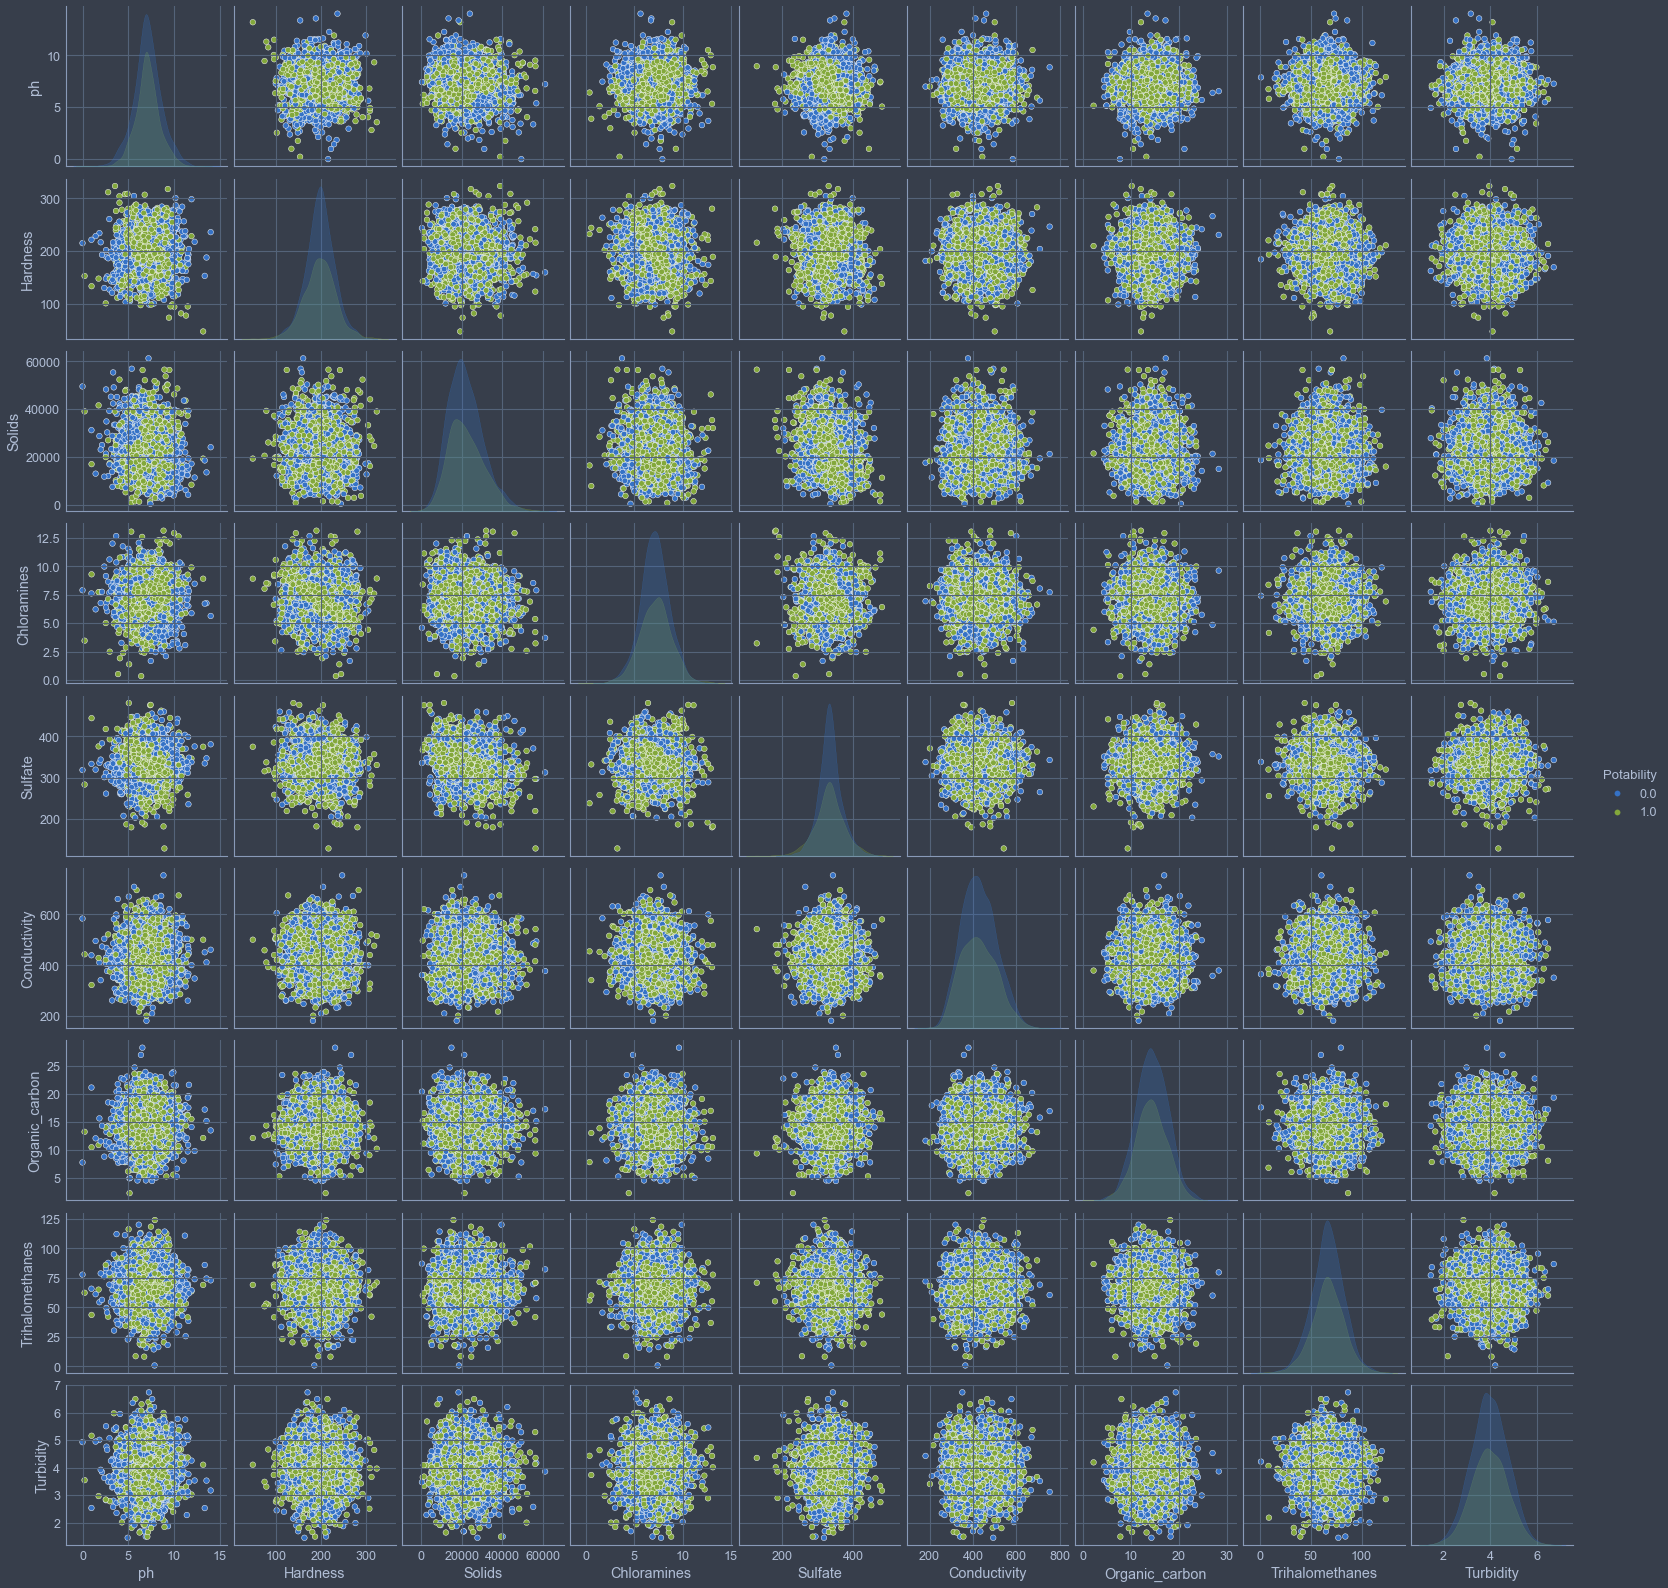

In [113]:
plt.figure(figsize = (25, 20))
sns.pairplot(df, hue="Potability")

<AxesSubplot:xlabel='ph', ylabel='Count'>

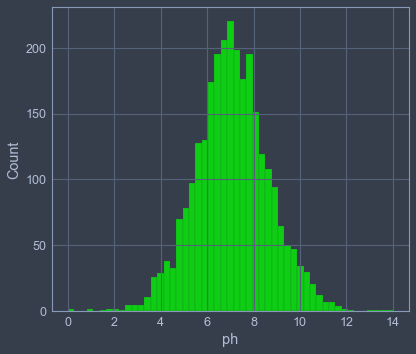

In [321]:
sns.histplot(df['ph'], color='lime')

<AxesSubplot:xlabel='Solids', ylabel='Count'>

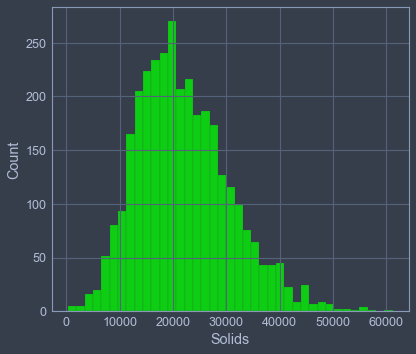

In [322]:
sns.histplot(df['Solids'], color='lime')

<h3>Deal with NaN Values</h3>
I decided to use KNNImputer because the data is random and it's simple to use.

In [323]:
#dealing with nan values using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


<h3>All the Imports I will need

In [325]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [326]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

I used more classifier models to find the best one for my dataframe.

First of all, raw data.

model: LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       204
         1.0       1.00      0.00      0.00       124

    accuracy                           0.62       328
   macro avg       0.81      0.50      0.38       328
weighted avg       0.76      0.62      0.48       328

------------------------------ 

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77       204
         1.0       0.63      0.36      0.46       124

    accuracy                           0.68       328
   macro avg       0.66      0.62      0.62       328
weighted avg       0.67      0.68      0.65       328

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.62      0.72      0.66       204
         1.0       0.36      0.27      0.31       124

    accuracy      

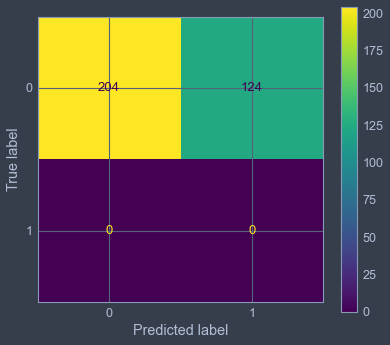

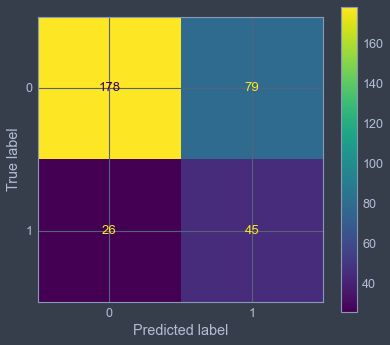

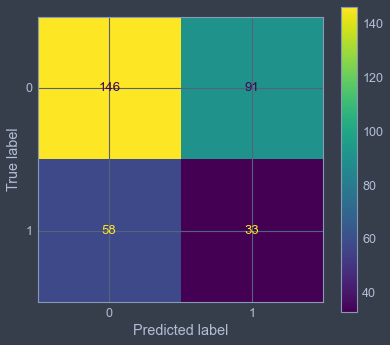

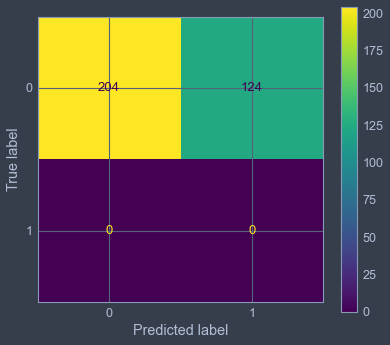

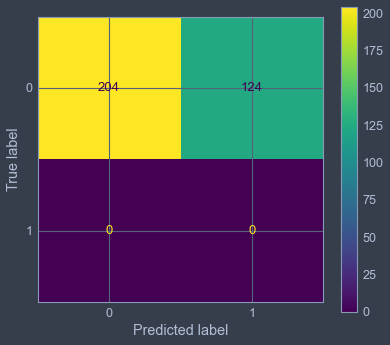

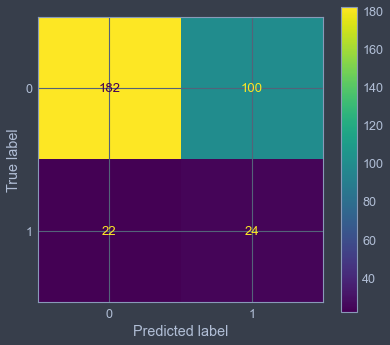

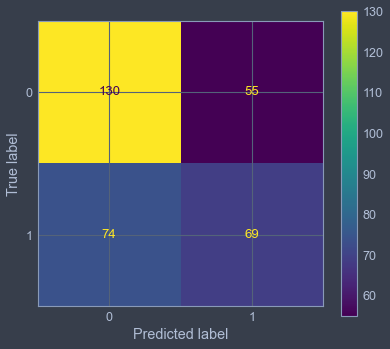

In [327]:
models = [LinearDiscriminantAnalysis(), RandomForestClassifier(), KNeighborsClassifier(),\
          SVC(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier()]
# scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    cm = confusion_matrix(m.predict(X_test),y_test)
    disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"])
    disp.plot()
    print('-'*30, '\n')

Used models with scalers

In [328]:

scalers = [StandardScaler(), MinMaxScaler()]
models = [ RandomForestClassifier(), KNeighborsClassifier(n_neighbors=30),\
          SVC(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier()]

names = df.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))
#         cm = confusion_matrix(y_pred, y_test)
#         disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
#         disp.plot()
        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')
    print('-'*60, '\n')   

model: RandomForestClassifier(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.72      0.89      0.79       204
         1.0       0.69      0.42      0.52       124

    accuracy                           0.71       328
   macro avg       0.70      0.65      0.66       328
weighted avg       0.71      0.71      0.69       328

0.7103658536585366
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.68      0.96      0.80       204
         1.0       0.80      0.26      0.39       124

    accuracy                           0.70       328
   macro avg       0.74      0.61      0.59       328
weighted avg       0.73      0.70      0.64       328

0.6951219512195121
------------------------------ 

model: SVC(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0

The best results gave Standart Scaler with RandomForestClassifier(), KNeighborsClassifier(n_neighbors=30), SVC()

<h3>Found Anomalies

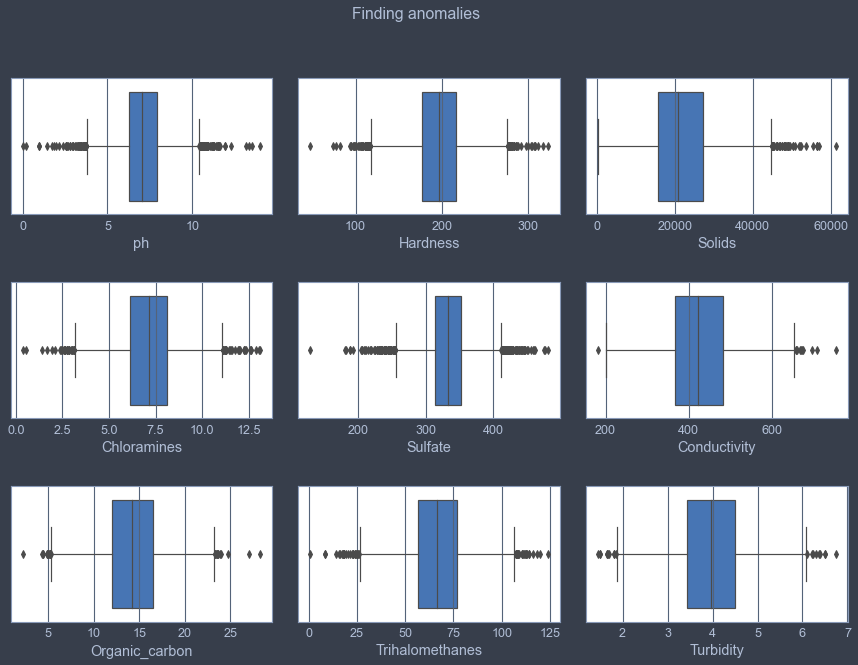

In [329]:
#Anomalies
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace = 0.1, hspace = 0.5)

fig.suptitle('Finding anomalies')

columns = list(df.columns)

for i in range(3):
    for j in range(3):
        ax = sns.boxplot(ax=axes[i, j], data=df, x=columns[i*3+j],)
        ax.set_facecolor('white')

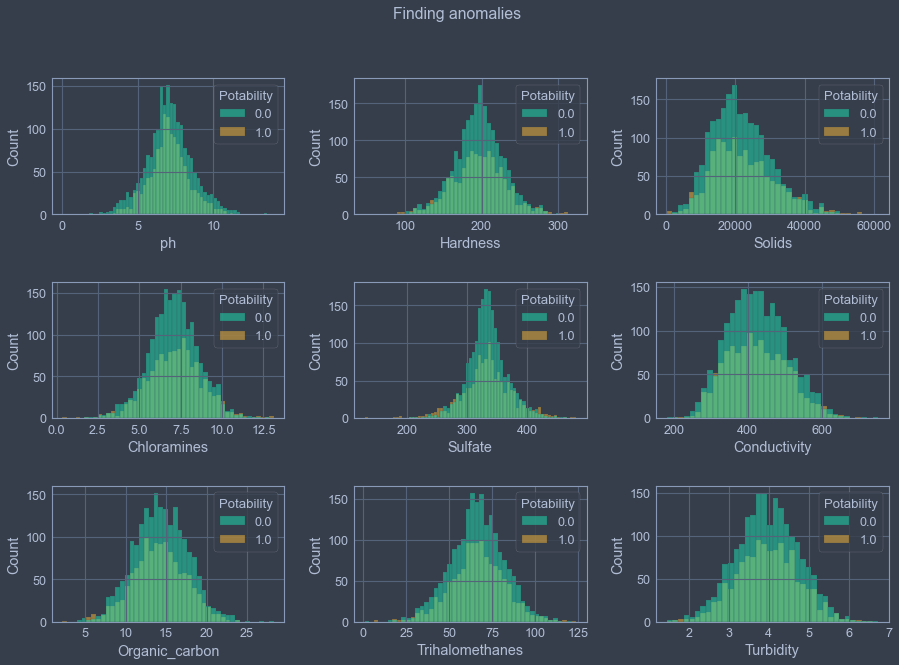

In [330]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

fig.suptitle('Finding anomalies')

columns = list(df.columns)

for i in range(3):
    for j in range(3):
        ax = sns.histplot(ax=axes[i, j], data=df, x=columns[i*3+j], hue="Potability", palette='turbo')

<h6>Based on boxplots and histograms I found some anomalies
    
    For example, there is no water with ph higher than 12 and lower than 2 (Wikipedia)
    
    Solids with values larger than 55000 are far from mean value. I want to consider that values larger than 1000 are unsafe.

In [331]:
df = df.drop(df[(df['Solids'] > 55000)].index)
df = df.dropna().reset_index(drop=True)
df = df.drop(df[(df['ph'] > 12)].index)
df = df.dropna().reset_index(drop=True)
df = df.drop(df[(df['ph'] < 2)].index)
df = df.dropna().reset_index(drop=True)
df = df.drop(df[(df['Sulfate'] < 200)].index)
df = df.dropna().reset_index(drop=True)

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

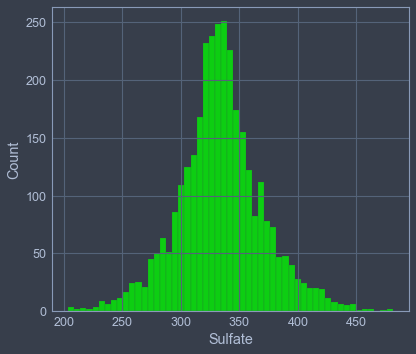

In [332]:
sns.histplot(data=df, x='Sulfate', color='lime')

Checked if there are not other anomalies.

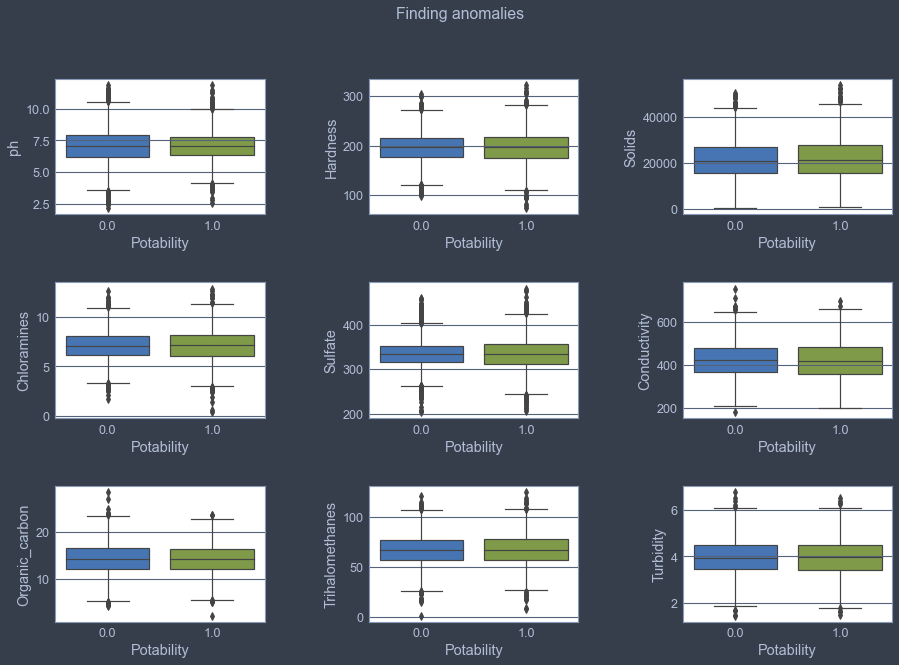

In [333]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

fig.suptitle('Finding anomalies')

columns = list(df.columns)

for i in range(3):
    for j in range(3):
        ax = sns.boxplot(df['Potability'], df[columns[i*3+j]], ax=axes[i, j], )
        ax.set_facecolor('white')

<h3>Here starts feature engineering

In [334]:
#feature engineering
df_c = df.copy()

Tested the 3 models one more time

In [335]:
scalers = [StandardScaler()]
models = [ RandomForestClassifier(), KNeighborsClassifier(n_neighbors=30),\
          SVC()]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))
#         cm = confusion_matrix(y_pred, y_test)
#         disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
#         disp.plot()
        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')

model: RandomForestClassifier(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77       416
         1.0       0.59      0.37      0.46       235

    accuracy                           0.68       651
   macro avg       0.65      0.61      0.61       651
weighted avg       0.67      0.68      0.66       651

0.6804915514592934
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79       416
         1.0       0.66      0.23      0.34       235

    accuracy                           0.68       651
   macro avg       0.67      0.58      0.56       651
weighted avg       0.67      0.68      0.63       651

0.6789554531490015
------------------------------ 

model: SVC(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0

I transformed the data so it has a more Normal Distribution shape.

<AxesSubplot:xlabel='Solids', ylabel='Count'>

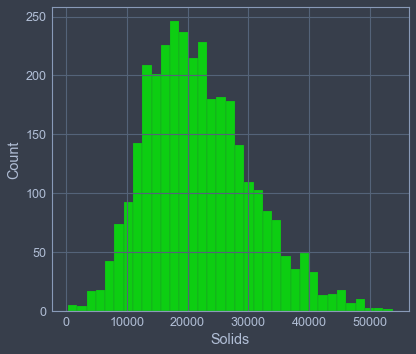

In [336]:
sns.histplot(data=df_c, x='Solids', color='lime')

<AxesSubplot:xlabel='Solids', ylabel='Count'>

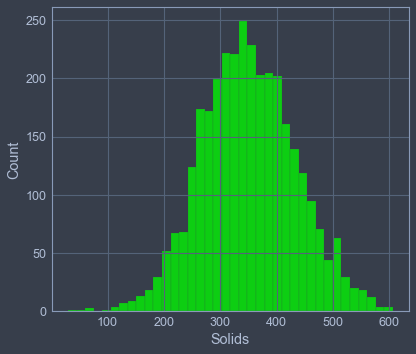

In [337]:
sns.histplot(df_c['Solids']**(1/1.7), color='lime')

In [338]:
df_c['Solids'] = df_c['Solids']**(1/1.7)

Checked the precition after these manipulations.

In [339]:
scalers = [StandardScaler()]
models = [ RandomForestClassifier(), KNeighborsClassifier(n_neighbors=30),\
          SVC()]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))
#         cm = confusion_matrix(y_pred, y_test)
#         disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
#         disp.plot()
        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')

model: RandomForestClassifier(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78       416
         1.0       0.62      0.33      0.43       235

    accuracy                           0.69       651
   macro avg       0.66      0.61      0.61       651
weighted avg       0.67      0.69      0.66       651

0.685099846390169
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       416
         1.0       0.66      0.22      0.33       235

    accuracy                           0.68       651
   macro avg       0.67      0.58      0.56       651
weighted avg       0.67      0.68      0.62       651

0.6774193548387096
------------------------------ 

model: SVC(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

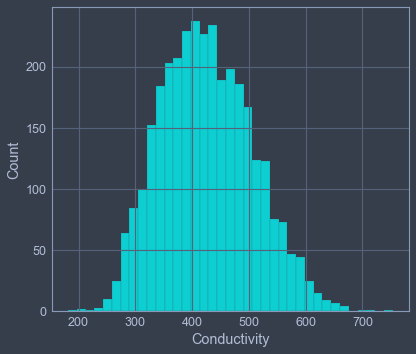

In [340]:
sns.histplot(data=df_c, x='Conductivity', color='cyan')

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

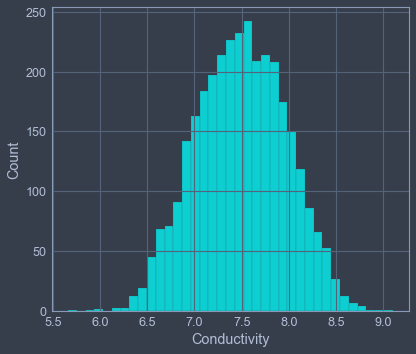

In [341]:
sns.histplot(df_c['Conductivity']**(1/3), color='cyan')

In [342]:
df_c['Conductivity'] = df_c['Conductivity']**(1/3)

model: RandomForestClassifier(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       416
         1.0       0.61      0.36      0.45       235

    accuracy                           0.69       651
   macro avg       0.66      0.62      0.62       651
weighted avg       0.67      0.69      0.66       651

0.6866359447004609
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79       416
         1.0       0.65      0.22      0.33       235

    accuracy                           0.68       651
   macro avg       0.66      0.58      0.56       651
weighted avg       0.67      0.68      0.62       651

0.6758832565284179
------------------------------ 

model: SVC(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0

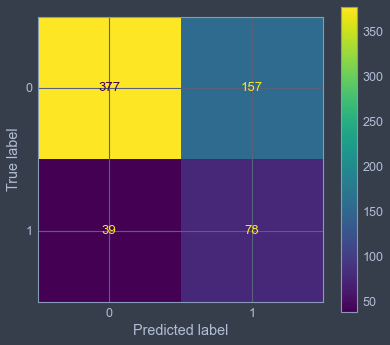

In [343]:
scalers = [StandardScaler()]
models = [ RandomForestClassifier(), KNeighborsClassifier(n_neighbors=30),SVC()]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))

        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')
        
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
disp.plot()

After all these manipulations SVC() presented itself better. But it is not the end. :)

<h3>Feature Selection

In [344]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector(min_corr=0.01)
selectedcolumns = pearson.select(df , 'Potability')

In [345]:
selectedcolumns

['Hardness', 'Solids', 'Chloramines', 'Organic_carbon']

model: RandomForestClassifier(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.64      0.76      0.70       418
         1.0       0.36      0.24      0.29       233

    accuracy                           0.57       651
   macro avg       0.50      0.50      0.49       651
weighted avg       0.54      0.57      0.55       651

0.5745007680491552
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.66      0.92      0.77       418
         1.0       0.52      0.16      0.24       233

    accuracy                           0.65       651
   macro avg       0.59      0.54      0.51       651
weighted avg       0.61      0.65      0.58       651

0.6466973886328725
------------------------------ 

model: SVC(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0

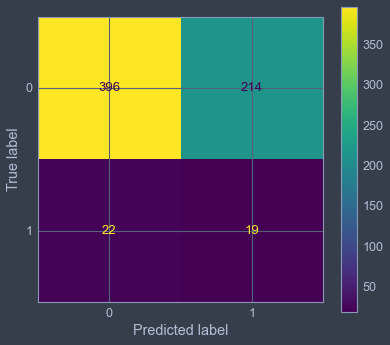

In [346]:
scalers = [StandardScaler()]
models = [ RandomForestClassifier(), KNeighborsClassifier(n_neighbors=30),SVC()]

names = (df[selectedcolumns]).columns
for scaler in scalers:    
    d = scaler.fit_transform(df[selectedcolumns])

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))

        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')
        
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
disp.plot()

In [347]:
from kydavra import PointBiserialCorrSelector
pointbiserial = PointBiserialCorrSelector()
selected_columns = pointbiserial.select(df, 'Potability')

In [348]:
selected_columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

Since the prediction accuracy is smaller, I will not use any of these techniques.

<h3>Balance the data

<AxesSubplot:xlabel='Potability', ylabel='count'>

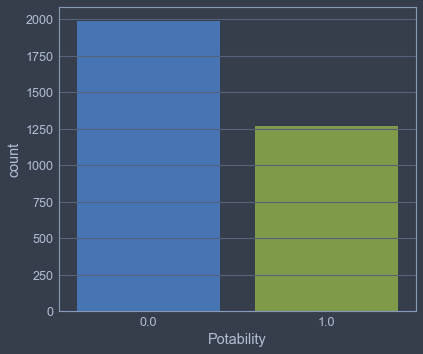

In [349]:
sns.countplot(df_c['Potability'])

<h6>First tried to balance via parameters of models. Not a good idea.

model: RandomForestClassifier(class_weight='balanced'), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       416
         1.0       0.57      0.33      0.42       235

    accuracy                           0.67       651
   macro avg       0.63      0.60      0.59       651
weighted avg       0.65      0.67      0.64       651

0.6697388632872504
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79       416
         1.0       0.65      0.22      0.33       235

    accuracy                           0.68       651
   macro avg       0.66      0.58      0.56       651
weighted avg       0.67      0.68      0.62       651

0.6758832565284179
------------------------------ 

model: SVC(C=1.1, class_weight='balanced'), scaler: StandardScaler()
              precisio

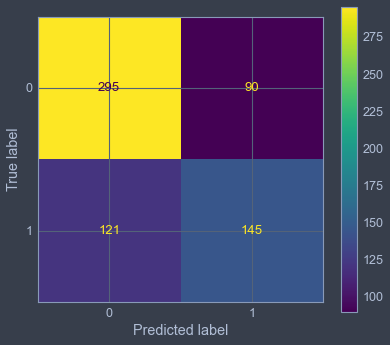

In [350]:
#try to balance the target
scalers = [StandardScaler()]
models = [ RandomForestClassifier(class_weight='balanced'), \
          KNeighborsClassifier(n_neighbors=30,),SVC(C=1.1,class_weight='balanced')]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))

        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')
        
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
disp.plot()

model: RandomForestClassifier(class_weight='balanced_subsample'), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.68      0.85      0.76       416
         1.0       0.53      0.31      0.39       235

    accuracy                           0.65       651
   macro avg       0.61      0.58      0.57       651
weighted avg       0.63      0.65      0.63       651

0.65284178187404
------------------------------ 



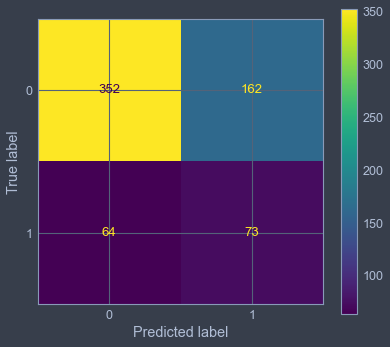

In [351]:
scalers = [StandardScaler()]
models = [ RandomForestClassifier(class_weight='balanced_subsample'),]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    
    for m in models:
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))

        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')
        
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
disp.plot()

<h4>I decided to try SMOTE() and ADASYN()

model: RandomForestClassifier(), scaler: StandardScaler(), balancer: SMOTE(random_state=42)
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       388
         1.0       0.74      0.70      0.72       407

    accuracy                           0.72       795
   macro avg       0.72      0.72      0.72       795
weighted avg       0.72      0.72      0.72       795

0.720754716981132
------------------------------ 

model: KNeighborsClassifier(n_neighbors=30), scaler: StandardScaler(), balancer: SMOTE(random_state=42)
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62       388
         1.0       0.63      0.61      0.62       407

    accuracy                           0.62       795
   macro avg       0.62      0.62      0.62       795
weighted avg       0.62      0.62      0.62       795

0.6188679245283019
------------------------------ 

model: SVC(), scaler: StandardScaler(), balance

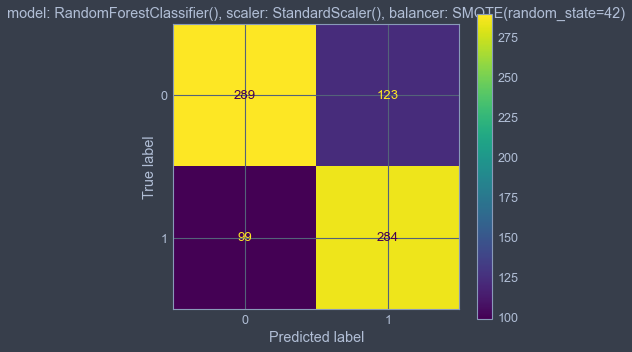

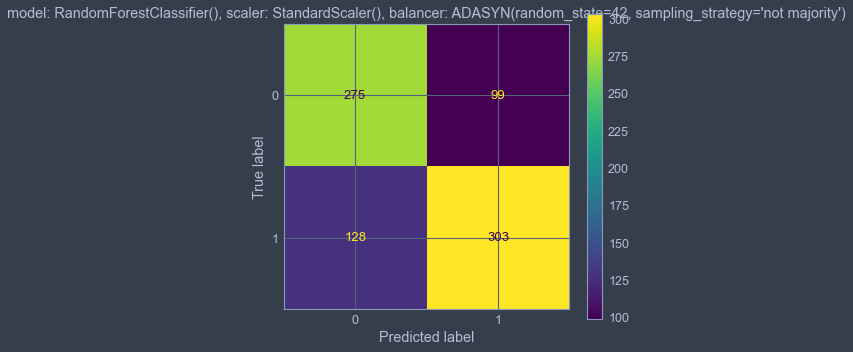

In [352]:
#use a balancer

balancers = [SMOTE(random_state=42), ADASYN(random_state=42, sampling_strategy='not majority')]
scalers = [StandardScaler()]
models = [RandomForestClassifier(), \
          KNeighborsClassifier(n_neighbors=30,), SVC()]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']
    
    for b in balancers:
        bal = b
        X_res, y_res = bal.fit_resample(X, y)
        
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)    
        
        for m in models:
            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)

            print(f'model: {str(m)}, scaler: {str(scaler)}, balancer: {str(b)}')
            print(classification_report(y_test,y_pred, zero_division=1))

            print(accuracy_score(y_test, y_pred))
            print('-'*30, '\n')
            
            if accuracy_score(y_test, y_pred) > 0.70:
                cm = confusion_matrix(y_pred, y_test)
                disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
                disp.plot()
                disp.ax_.set_title(f'model: {str(m)}, scaler: {str(scaler)}, balancer: {str(b)}')

model: RandomForestClassifier(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       403
         1.0       0.71      0.75      0.73       402

    accuracy                           0.72       805
   macro avg       0.72      0.72      0.72       805
weighted avg       0.72      0.72      0.72       805

0.724223602484472
------------------------------ 

model: KNeighborsClassifier(n_neighbors=50), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.58      0.55      0.56       403
         1.0       0.57      0.60      0.58       402

    accuracy                           0.57       805
   macro avg       0.57      0.57      0.57       805
weighted avg       0.57      0.57      0.57       805

0.5739130434782609
------------------------------ 

model: SVC(), scaler: StandardScaler()
              precision    recall  f1-score   support

         0.0       0.

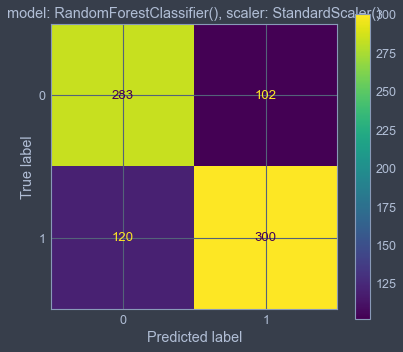

In [353]:
#use a balancer(chosen SMOTE)
#algorithm proposed in the Sigmoid Book

scalers = [StandardScaler()]
models = [RandomForestClassifier(), \
          KNeighborsClassifier(n_neighbors=50,), SVC()]

names = df_c.drop(['Potability'], axis=1).columns
for scaler in scalers:    
    d = scaler.fit_transform(df_c.drop(['Potability'], axis=1))

    scaled_df = pd.DataFrame(d, columns=names)
    
    X = scaled_df
    y = df_c['Potability']
    
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)    

    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
        
    for m in models:
        m.fit(X_res, y_res)
        y_pred = m.predict(X_test)

        print(f'model: {str(m)}, scaler: {str(scaler)}')
        print(classification_report(y_test,y_pred, zero_division=1))

        print(accuracy_score(y_test, y_pred))
        print('-'*30, '\n')

        if accuracy_score(y_test, y_pred) > 0.70:
            cm = confusion_matrix(y_pred, y_test)
            disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
            disp.plot()
            disp.ax_.set_title(f'model: {str(m)}, scaler: {str(scaler)}')

In [354]:
#create df with SMOTE
d = scaler.fit_transform(df.drop(['Potability'], axis=1), )

scaled_df = pd.DataFrame(d, columns=names)

X = scaled_df
y = df['Potability']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

b_df = pd.concat([X_res, y_res], axis=1)

In [355]:
b_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,-0.012307,-0.011132,0.006444,-0.001062,-0.007573,-0.008410,-0.004932,-0.000777,0.007435,0.500000
std,0.965965,0.990521,0.982713,0.984591,1.013639,0.994096,0.983515,0.978322,0.979305,0.500063
min,-3.454761,-3.758265,-2.504572,-4.308855,-3.603371,-3.022740,-3.657072,-4.149542,-3.227498,0.000000
25%,-0.563289,-0.604166,-0.707236,-0.628901,-0.573964,-0.753978,-0.665536,-0.607687,-0.657795,0.000000
50%,-0.044606,0.007775,-0.118091,0.003765,-0.018827,-0.063577,-0.027580,0.015902,-0.010966,0.500000
75%,0.533333,0.601921,0.621195,0.631402,0.541089,0.682781,0.662882,0.636571,0.682186,1.000000
max,3.359686,3.874949,3.688824,3.690112,4.064254,4.044039,4.234480,3.638118,3.554133,1.000000


<AxesSubplot:xlabel='ph', ylabel='Count'>

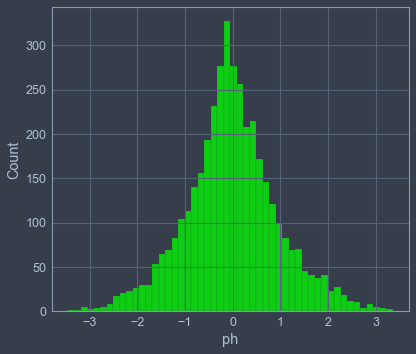

In [356]:
sns.histplot(b_df['ph'], color='lime')

In [357]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000,3252.000000
mean,7.086355,196.400129,21921.630437,7.117877,333.895050,426.090351,14.295159,66.416376,3.967129,0.389299
std,1.435291,32.708391,8625.827458,1.570468,36.207925,80.934577,3.307843,15.830294,0.780021,0.487666
min,2.128531,73.492234,320.942611,0.352000,203.444521,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.259996,176.888645,15626.864313,6.127421,313.872583,365.592785,12.084312,56.483597,3.439711,0.000000
50%,7.037457,196.928061,20882.160702,7.128299,333.270875,421.555286,14.234528,66.656773,3.955028,0.000000
75%,7.905700,216.614954,27250.471317,8.110201,352.960380,481.792304,16.560201,76.749604,4.500320,1.000000
max,11.907740,323.124000,53735.899194,12.912187,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Created the final model, used pipeline and hyperparameter tuning

In [374]:
X = df.drop(['Potability'], axis=1).copy()
y = df['Potability'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 400)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 30)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

param_grid = {
    'classifier__bootstrap': [True],
    'classifier__max_depth': [110, 120, 140],
    'classifier__max_features': [2, 3, 4],
    'classifier__min_samples_leaf': [2, 3, 4, 5],
    'classifier__min_samples_split': [6, 8, 10, 12],
    'classifier__n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                          )

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'cv_score:{cv_score}, test_score:{test_score}')
grid_search.best_params_

cv_score:0.663980510851912, test_score:0.6374807987711214


{'classifier__bootstrap': True,
 'classifier__max_depth': 140,
 'classifier__max_features': 4,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 6,
 'classifier__n_estimators': 1000}

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       418
         1.0       0.51      0.45      0.47       233

    accuracy                           0.65       651
   macro avg       0.61      0.60      0.60       651
weighted avg       0.64      0.65      0.64       651



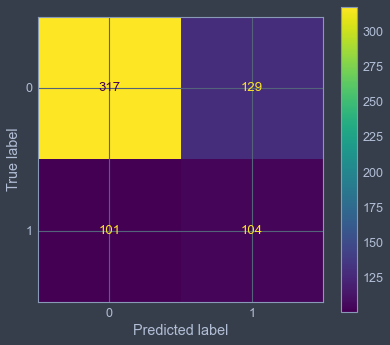

In [383]:
#Test the model with the best parameters
pipeline_full = imbpipeline(steps = [['scaler', StandardScaler()],
                                     ['smote', SMOTE(random_state=42)],
                                     ['classifier', RandomForestClassifier()]])

model = pipeline_full.fit(X_train, y_train)
y_hat = model.predict(X_test)
print(classification_report(y_test, y_hat))

cm = confusion_matrix(y_hat, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1"], )
disp.plot()

Now we have to understand why our model made that decitions

In [377]:
pip install shap

In [378]:
import shap
shap.initjs()

Exact explainer: 652it [05:20,  1.97it/s]                                                                              


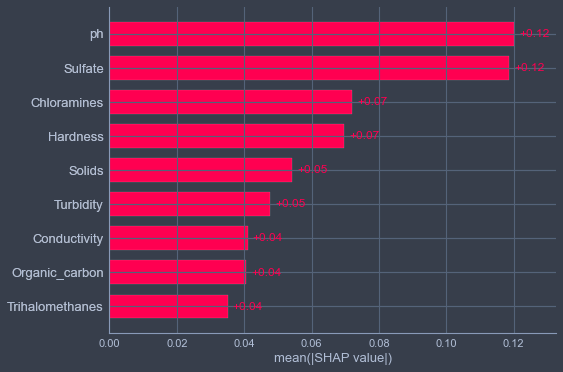

In [385]:
explainer = shap.Explainer(model.predict, X_train,
feature_names = list(df.columns)[:-1])
shap_values = explainer(X_test)
shap.plots.bar(shap_values)